In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import pearsonr

total = pd.read_csv('/Users/kellyg/books-analysis/data/totalData.csv', delimiter='\t')

/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_90920/1040815603.py:8: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  total = pd.read_csv('/Users/kellyg/books-analysis/data/totalData.csv', delimiter='\t')


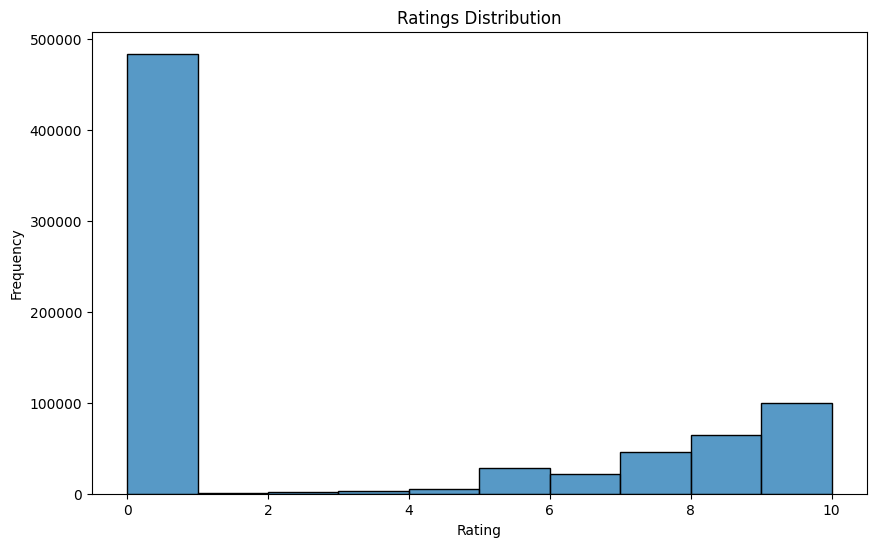

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(total['Book-Rating'], bins=10)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Why so many zeroes?

It is possible a "zero" may be an indicator of no rating provided, rather than a rating of 0/10. If we assume this, the distribution looks very different:

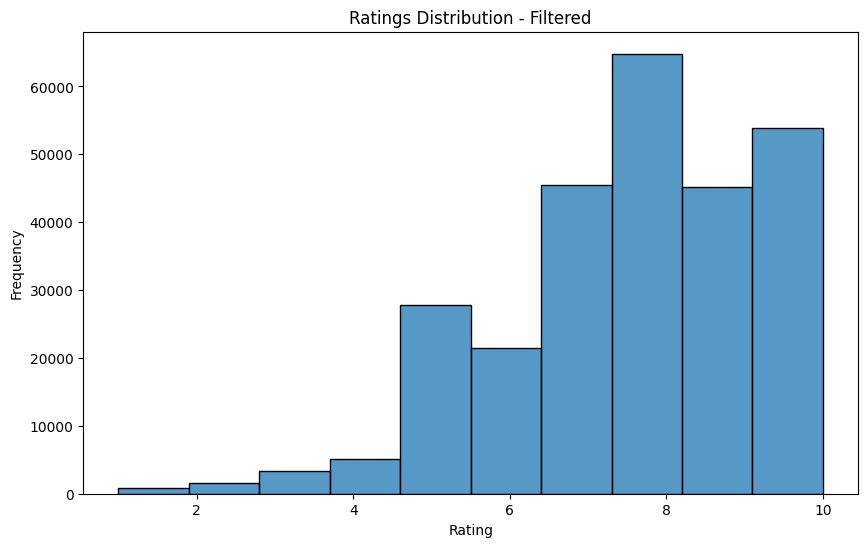

In [3]:
no_zero = total[total['Book-Rating'] != 0]
plt.figure(figsize=(10, 6))
sns.histplot(no_zero['Book-Rating'], bins=10)
plt.title('Ratings Distribution - Filtered')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [4]:
meanRating = total['Book-Rating'].mean()
medianRating = total['Book-Rating'].median()

meanRating_filter = no_zero['Book-Rating'].mean()
medianRating_filter = no_zero['Book-Rating'].median()

print('Mean before filtering: ' + str(meanRating))
print('Mean after filtering: ' + str(meanRating_filter))
print('-------------------------')
print('Median before filtering: ' + str(medianRating))
print('Median after filtering: ' + str(medianRating_filter))


Mean before filtering: 2.7688879684905157
Mean after filtering: 7.736140525263615
-------------------------
Median before filtering: 0.0
Median after filtering: 8.0


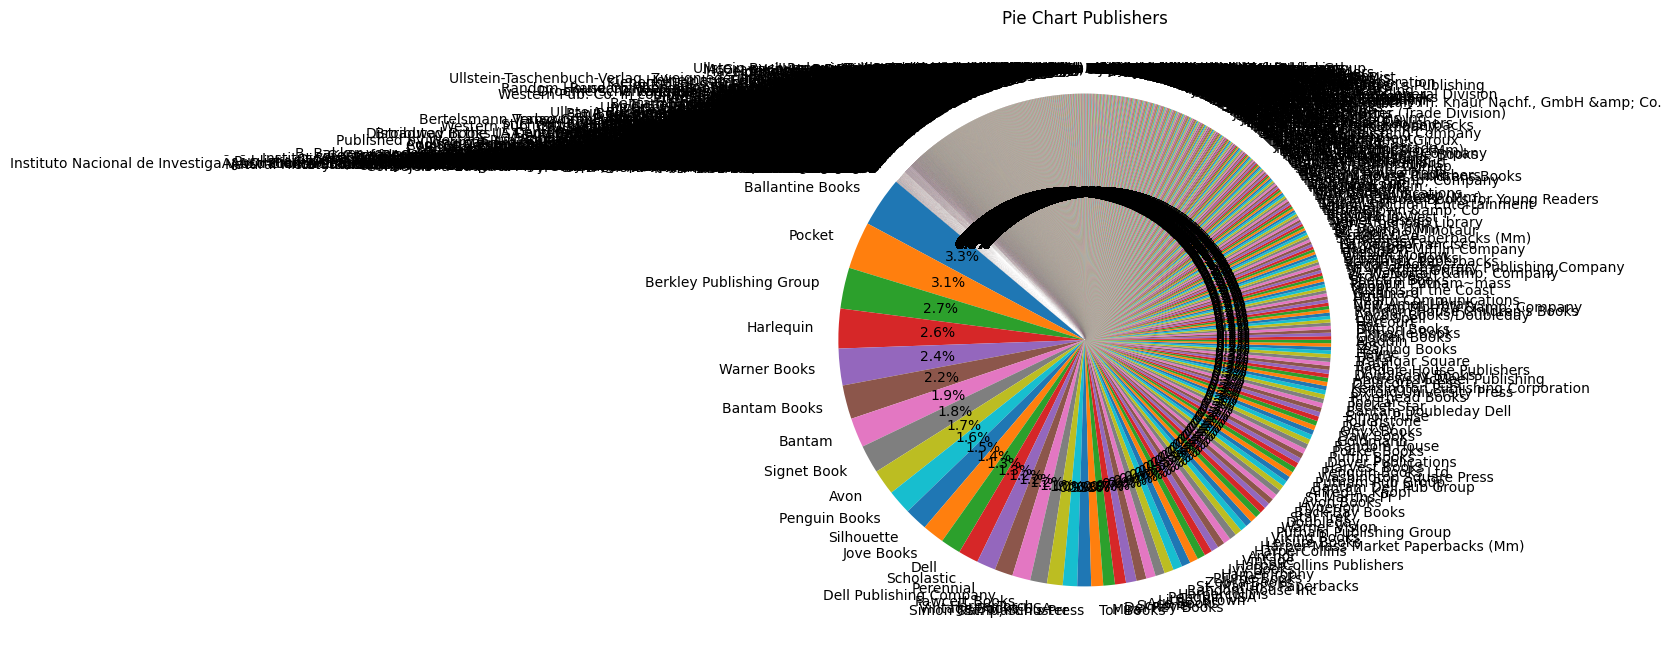

In [5]:
plt.figure(figsize=(8, 8))
pubs = total['Publisher'].value_counts()
plt.pie(pubs, labels=pubs.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Publishers')
plt.show()


## Too many publishers!

The pie chart quickly becomes unreadable -- there are many more publishers in the dataset than I initially expected! To fix this, I will remake this by only looking at the top ten publishers, only for the sake of publisher analysis.

14502

Publisher
Ballantine Books            24707
Pocket                      23352
Berkley Publishing Group    20247
Harlequin                   19564
Warner Books                18118
Bantam Books                16727
Bantam                      14600
Signet Book                 13921
Avon                        12563
Penguin Books               12088
Name: count, dtype: int64


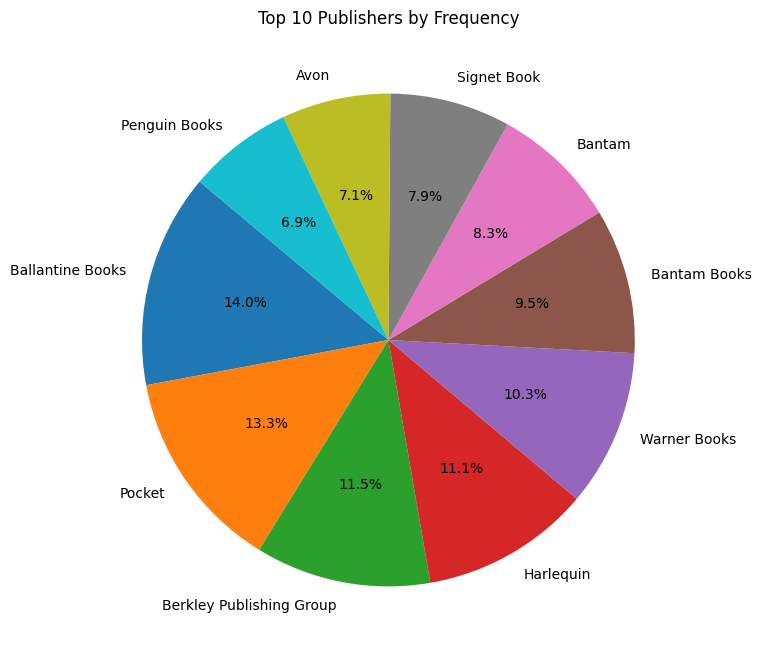

In [6]:
differentPublishers = total['Publisher'].nunique()
print(differentPublishers)
print()

tenPubs = total['Publisher'].value_counts().head(10)
print(tenPubs)

plt.figure(figsize=(8, 8))
plt.pie(tenPubs, labels=tenPubs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Frequency')
plt.show()

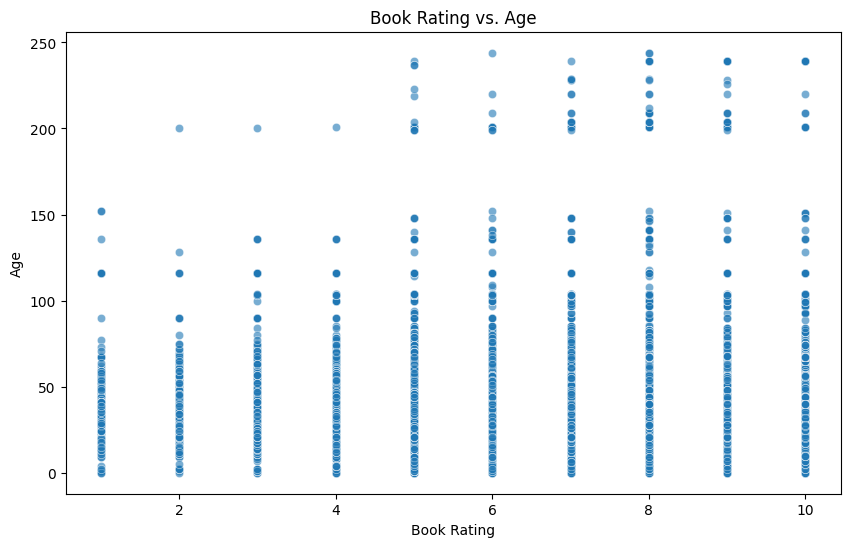

269617
760


In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_zero, x='Book-Rating', y='Age', alpha=0.6)

plt.title('Book Rating vs. Age')
plt.xlabel('Book Rating')
plt.ylabel('Age')
plt.show()

overOneHundred = count = (no_zero["Age"] > 100).sum()
print(len(no_zero["Age"]))
print(overOneHundred)

## 250 years old?

We are already excluding zero ratings, as these likely represent null values. However, we now must consider many values were likely entered incorrectly in another column -- "Age" is supposed to represent the age of the reader/reviewer, and only about 0.3% are over 100, so we can exclude any outlier values, as these are likely mistakes. 

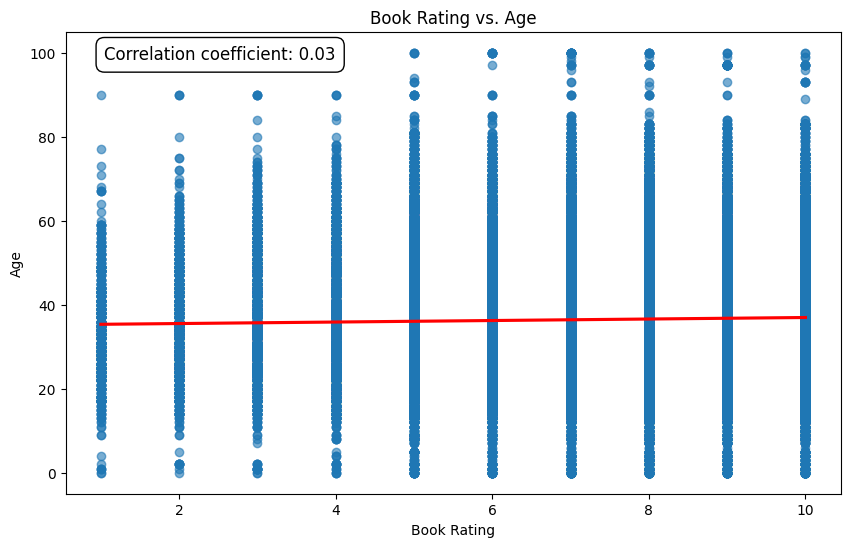

In [8]:
underOneHundred = no_zero[no_zero['Age'] <= 100]
corr, _ = pearsonr(underOneHundred['Book-Rating'], underOneHundred['Age'])

plt.figure(figsize=(10, 6))

sns.regplot(data=underOneHundred, x='Book-Rating', y='Age', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title('Book Rating vs. Age')
plt.xlabel('Book Rating')
plt.ylabel('Age')
plt.text(0.05, 0.95, f'Correlation coefficient: {corr:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.show()


There appears to be no correlation between age and book rating!

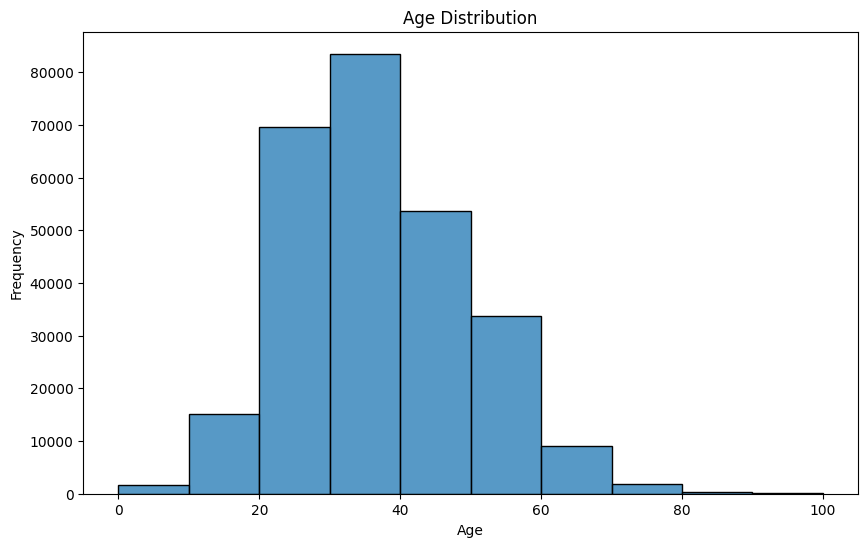

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(underOneHundred['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_90920/1709517563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underOneHundred['Year-Of-Publication'] = pd.to_numeric(underOneHundred['Year-Of-Publication'], errors='coerce')
/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_90920/1709517563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underOneHundred.dropna(subset=['Year-Of-Publication'], inplace=True)  # This drops rows with NaNs in 'Year-Of-Publication'


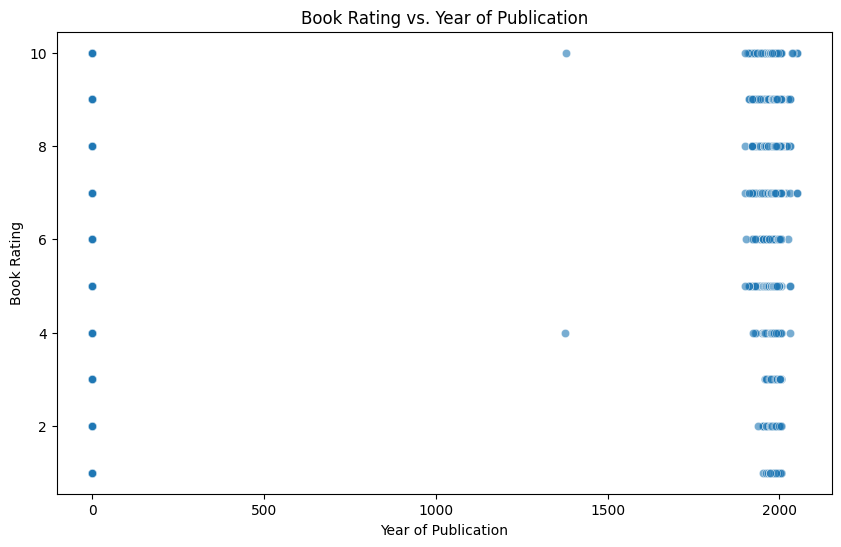

In [10]:

underOneHundred['Year-Of-Publication'] = pd.to_numeric(underOneHundred['Year-Of-Publication'], errors='coerce')
underOneHundred.dropna(subset=['Year-Of-Publication'], inplace=True)  # This drops rows with NaNs in 'Year-Of-Publication'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=underOneHundred, x='Year-Of-Publication', y='Book-Rating', alpha=0.6)

plt.title('Book Rating vs. Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Book Rating')
plt.show()


For the sake of this, though these books could have been published thousands of years ago, we will only observe books after the year 1900 in order to observe the trend of the majority of data. Like ratings and ages, mis-entry of data could be causing these outliers.

/var/folders/rv/q52q8kmj0s558xpyhlshtzw00000gn/T/ipykernel_90920/1458603261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after1900.dropna(subset=['Book-Rating'], inplace=True)


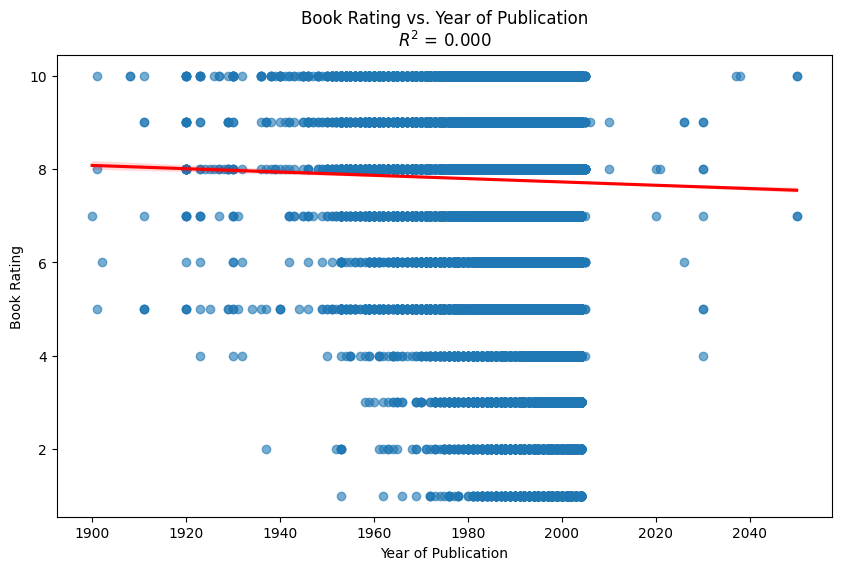

In [12]:
from scipy.stats import linregress

after1900 = underOneHundred[underOneHundred['Year-Of-Publication'] >= 1900]

# Drop rows with NaNs in 'Book-Rating' to avoid errors
after1900.dropna(subset=['Book-Rating'], inplace=True)

# Perform linear regression to get the line of best fit and R^2 value
slope, intercept, r_value, p_value, std_err = linregress(after1900['Year-Of-Publication'], after1900['Book-Rating'])

# Create scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=after1900, x='Year-Of-Publication', y='Book-Rating', scatter_kws={'alpha':0.6}, line_kws={"color": "red"})

# Add title and labels
plt.title(f'Book Rating vs. Year of Publication\n$R^2$ = {r_value**2:.3f}')
plt.xlabel('Year of Publication')
plt.ylabel('Book Rating')

# Show the plot
plt.show()


There appears to be no correlation between year of publication and rating

Next, I will do more data cleaning and processing to prepare the data for machine learning.

In [14]:
after1900.to_csv('data/data_for_cleaning.csv', index=False)